<a href="https://colab.research.google.com/github/abdulhkeemalrasheedi/DATA-MINING/blob/main/abdulhakeem%20alrasheedi7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

In [2]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
centers = [[1, 1], [-1, -1], [1, -1]]
x, labls_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4, random_state=0)
scaler = StandardScaler()
x = scaler.fit_transform(x)

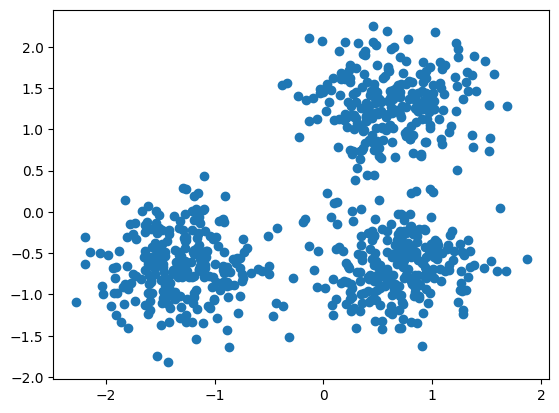

In [3]:
import matplotlib.pyplot as plt
plt.scatter(x[:, 0], x[:, 1])
plt.show()

In [4]:
import numpy as np
from sklearn import metrics
from sklearn.cluster import DBSCAN
db = DBSCAN(eps=0.3, min_samples=10).fit(x)
labels = db.labels_
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_noise = list(labels).count(-1)
print("Estimated number of clusters: %d" % n_clusters)
print("Estimated number of noise points: %d" % n_noise)

Estimated number of clusters: 3
Estimated number of noise points: 18


In [5]:
print(f"Homogeneity: {metrics.homogeneity_score(labls_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labls_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labls_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labls_true, labels):.3f}")
print(f"Adjusted Mutual Information: {metrics.adjusted_mutual_info_score(labls_true, labels):.3f}")
print(f"Silhouette Coefficient: {metrics.silhouette_score(x, labels):.3f}")


Homogeneity: 0.953
Completeness: 0.883
V-measure: 0.917
Adjusted Rand Index: 0.952
Adjusted Mutual Information: 0.916
Silhouette Coefficient: 0.626


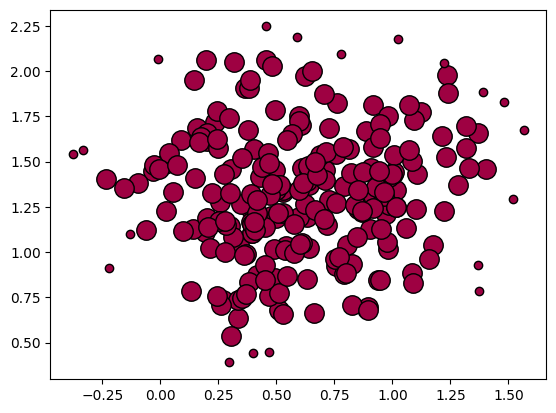

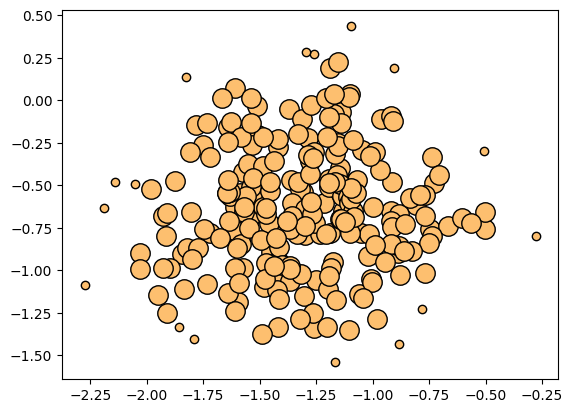

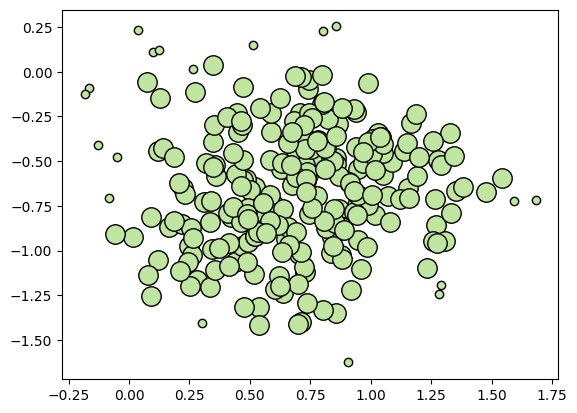

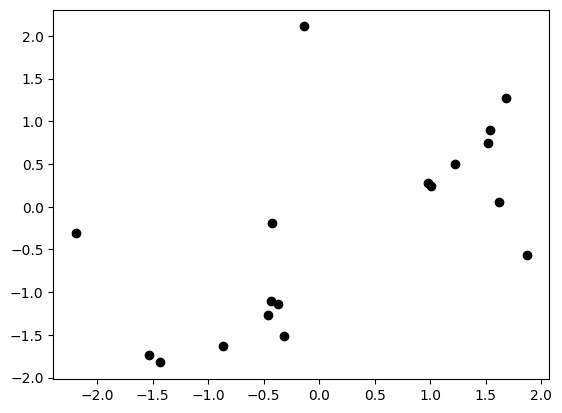

In [8]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = labels == k
unique_labels = set(labels)
core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = labels == k
    xy = x[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=14)
    xy = x[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col), markeredgecolor='k', markersize=6)
    plt.show()